In [1]:
import torch
from doctr.models import crnn_mobilenet_v3_large
from doctr.models import recognition_predictor, ocr_predictor
from doctr.io import DocumentFile
import matplotlib.pyplot as plt
from doctr.datasets import VOCABS


# Add Tifinagh characters to VOCAB
tifinagh = ""
for i in range(0x2D30, 0x2D67 + 1):
    tifinagh += chr(i)
tifinagh += chr(0x2D6F)
tifinagh += chr(0x2D70)
tifinagh += chr(0x2D7F)
VOCABS['tifinagh'] = tifinagh
VOCABS['tifinagh-ircam'] = "ⴰⴱⴳⴷⴹⴻⴼⴽⵀⵃⵄⵅⵇⵉⵊⵍⵎⵏⵓⵔⵕⵖⵙⵚⵛⵜⵟⵡⵢⵣⵥⵯ"
VOCABS['tamazight'] = VOCABS["french"] + VOCABS['tifinagh']
VOCABS['zgh'] = VOCABS['french'] + VOCABS['tifinagh-ircam']

# Load custom recognition model
reco_model = crnn_mobilenet_v3_large(pretrained=False, pretrained_backbone=False, vocab=VOCABS['zgh'])
reco_params = torch.load('crnn_mobilenet_v3_large_zgh.pt', map_location="cpu")
reco_model.load_state_dict(reco_params)
reco_predictor = recognition_predictor(reco_model, pretrained=True)

(-0.5, 76.5, 49.5, -0.5)

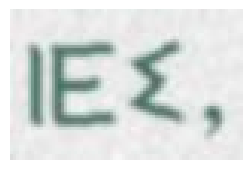

In [2]:
image_path = "val/images/0.jpg"
input_page = DocumentFile.from_images(image_path)[0]

# Display the input image
plt.figure(figsize=(3, 3))
plt.imshow(input_page)
plt.axis('off')

In [3]:
out = reco_predictor([input_page])
print(f"Prediction: {out[0][0]}\nConfidence: {out[0][1]:.2f}")

Prediction: ⵏⴹⵉ,
Confidence: 0.90


In [4]:
predictor = ocr_predictor(reco_arch=reco_model, pretrained=True)

image_path = "1.jpg"
input_page = DocumentFile.from_images(image_path)[0]

In [5]:
output = predictor([input_page])

In [6]:
res = ""
for obj in output.pages:
    for obj1 in obj.blocks:
        for obj2 in obj1.lines:
            for obj3 in obj2.words:
                res = res + " " + obj3.value
            res = res + "\n"
        res = res + "\n"
print(res)

 ⵕⴰⵢⵕ ⴷ ⵢⵉⵏⵏⴰⵢⵔ

 ⵉⴽⴽⴰ ⵢⵉⵏⵏⴰⵢⵔ ⴷⴰ ⵉⵏⵇⵇⴰ ⵉⵣⴳⴰⵔⵏ ⴰⴽⴽ" ⵎⴰⵏⵉ ⴳ ⵍⵍⴰⵏ. ⵎⴰⵛⴰ,
 ⵢⴰⵜ ⵜⵎⵖⴰⵔⵜ ⵉⵛⵡⴰⵏ ⵓⵔ ⵉⵖⵉⵢ ⵢⴰ ⴰⵙ ⵉⵏⵖ ⴰⵣⴳⵔ ⵏⵏⵙ.
 ⵉⵏⵏⴰ ⵢⵉⵏⴰⵢⵔ ⴷ ⵢⵉⵅⴼ ⵏⵏⵙ: "ⵉⵇⵇⴰⵏ ⴷ ⴰⴷ ⵏⵖⵖ ⴰⴳⵏⴷⵓⵣ ⵏ
 ⵜⵎⵖⴰⵔⵜ ⵉⵣⴷⵖⵏ ⴳ ⵓⴷⵔⴰⵔ!". ⵎⴰⵛⴰ ⵏⵜⵜⴰⵜ, ⵜⵃⴹⴰ ⴰⴳⵏⴷⵓⵣ
 ⵏⵏⵙ, ⵜⵇⵇⵏ ⵖⵉⴼⵙ ⴳ ⵓⵃⴰⵏⵓ. ⴷⴰ ⵜⴻⵜⵜⵇⵇⵍ ⴰⴷ ⵉⴼⴼⵖ ⵡⴰⵢⵢⵓⵔ ⵏ
 ⵢⵉⵏⵏⴰⵢⵔ ⵃⵎⴰ ⴰⴷ ⵜⵕⵥⵎ ⵉ ⵓⴳⵏⴷⵓⵣ ⵏⵏⵙ ⴰⴷ ⵉⵙⵓⵎⵎⵔ.

 ⵉⴼⴼⵖ ⵢⵉⵏⵏⴰⵢⵔ, ⵜⵎⵎⵔ ⵜⵎⵖⴰⵔⵜ, ⵜⵏⵏⴰ
 ⴰⵙ ⵉⵉⵓⴳⵏⴷⵓⵣ ⵏⵏⵙ; "ⴽⵔ,ⴼⴼⵖ, ⵉⴷⴷⴰ
 ⵢⵉⵏⵏⴰⵢⵔ ⴰⵎⵅⵉⴱ". ⵉⴷⴷⵓ ⵢⵉⵏⵏⴰⵢⵔ
 ⵖⵔ ⴱⵕⴰⵢⵕ. ⵉⵏⵏⴰ ⴰⵙ; "ⵕⴹⵍ ⵉⵢⵉ,
 ⴻ ⴰⵎⴷⴷⴰⴽⴽⵯⵍ ⵉⵏⵓ, ⵢⴰⵏ ⵡⴰⵙⵙ ⵙⴳ
 ⵡⵓⵙⵙⴰⵏ ⵏⵏⴽ. ⵔⵉⵖ ⴰⴷ ⵏⵖⵖ ⴰⴳⵏⴷⵓⵣ
 ⵏⵜⵎⵖⴰⵔⵜ ⵏⵏⴰ ⵉⵏⵔⴰⵏ ⵓⵙⵙⴰⵏ ⴷ ⵢⵉⴹⴰⵏ
 ⵓ ⵓⵙⴳⴳⵯⴰⵙ". ⵉⵕⴹⵍ ⴰⵙ ⵢⴰⵏ ⵡⴰⵙⵙ.
 ⵢⴰⵖⵓⵍ ⴷ ⵙ ⵓⵚⵎⵎⵉⴹ ⴷ ⵓⴳⵔⵉⵙ,

 ⵢⴰⴼ ⴷ ⴰⵅⵏⵓⵥ ⵏⵜ ⵜⵎⵖⴰⵔⵜ ⴱⵕⵕⴰ, ⴰⵀⴰ ⵉⵏⵖ ⵜ.

 ⴱⵕⴰⵢⵕ ⵉⴳⵍⵍⵉⵏ, ⵉⵔⴰ ⴰⵕⴹⴹⴰ ⵏⵙ. ⵎⴰⵛⴰ, ⵉⵏⵏⴰⵢⵔ ⴷⴰ ⵖⵉⴼⵙ
 ⵎⵛ ⴰⵙ ⵉⵏⵏⴰ, "ⴰⴷ ⴰⴽ ⵔⵔⴰⵔⵖ ⴰⵙⵙ ⵏⵏⴽ""", ⵉⵎⵎⵔ ⴹⵕⴰⵢⵕ,
 ⵜⴼⴼⵖ ⴷ ⵜⴰⴼⵓⴽⵜ. ⴻ ⵉⵙ ⴰⵙ ⵉⵏⵏⴰ, "ⵓⵔ ⴰⴽ ⵜⵜⵔⴰⵔⴰⵖ ⴰⵙⵙ ⵏⵏⴽ",

 ⵉⴽⴽⴰⵜ ⵜⴰⵇⴱⴱⴰⴹⵜ,

 ⴰⵔ ⴻ ⵉⵜⵜⵔⵓ ⵙ ⵓⵏⵥⴰⵕ.

 ⴰⵢⵏⵏⴰⵖ ⴰⵙ ⵜⵜⵉⵏⵉⵏ ⵉ ⵕⴰⵢⵕ ⴰⵢⵢⵓⵔ ⵉⵏⵏⴳⵣⴰⵏ ⴷ ⴱⵓ ⵉⵎⴹⴹⴰⵡⵏ.

 ⵅ?




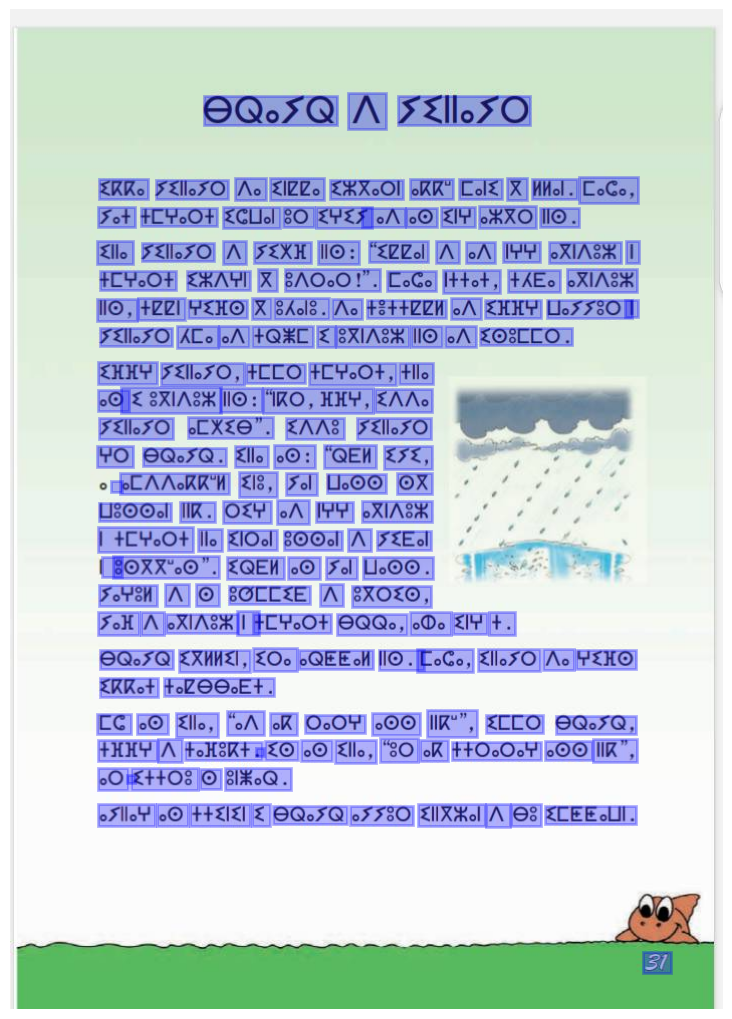

In [7]:
output.show([input_page])